In [1]:
import matplotlib.pyplot as plt
import numpy as np
from os.path import join
import pickle
import pandas as pd

In [2]:
with open('Electric_Fields/1.5mm_seq01_Spot1200_2Hz.pkl', 'rb') as f:
    dict = pickle.load(f)
V_4d = dict['v(x,y,z,t)_mv']
V_3d = np.squeeze(V_4d)
mesh = dict['2d_mesh_um']
z = dict['z_um']
""" t_start = dict['t_start_ms']
t_end = dict['t_end_ms'] """
px_coords = dict['pixel_coordinates_um']
diodes = dict['on_diode_data']

/var/folders/l0/t45vdcs91lxccfbb84wx15jr0000gn/T/ipykernel_20048/4213797843.py:2: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  dict = pickle.load(f)


<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
/var/folders/l0/t45vdcs91lxccfbb84wx15jr0000gn/T/ipykernel_20048/2474649442.py:6: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("x-Distance ($\mu$m)", fontsize=14)
/var/folders/l0/t45vdcs91lxccfbb84wx15jr0000gn/T/ipykernel_20048/2474649442.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("y-Distance ($\mu$m)", fontsize=14)


Text(0, 0.5, 'Potential (mV)')

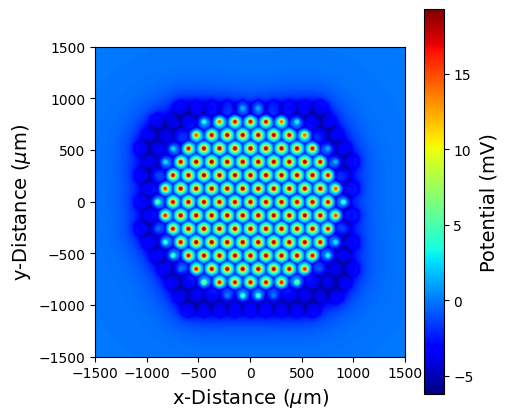

In [3]:
fig, ax = plt.subplots(figsize=(5,5))
#field_map = ax.imshow(V_3d[:,:,35]-V_3d[:,:,87], origin='lower', extent=(-750,750,-750,750), aspect=1, cmap='jet')
field_map = ax.imshow(V_3d[:,:,1], origin='lower', extent=(-1500,1500,-1500,1500), aspect=1, cmap='jet')
cb=fig.colorbar(field_map)

plt.xlabel("x-Distance ($\mu$m)", fontsize=14)
plt.ylabel("y-Distance ($\mu$m)", fontsize=14)
cb.ax.set_ylabel("Potential (mV)", fontsize=14)

In [4]:
import os
for z in range(V_3d.shape[2]):
    slice_2d = V_3d[:, :, z]  # Extract the x,y slice for the current z
    df = pd.DataFrame(slice_2d)   # Convert to DataFrame for easy CSV export
    # make dir if not exists
    output_dir = 'Attach_Electric_Fields/seq01_Spot1200_2Hz'
    os.makedirs(output_dir, exist_ok=True)
    filename = f'{output_dir}/slice_{z}.txt'   # Define the filename with the z slice number
    df.to_csv(filename, index=False, header=False, sep="\t")  # Save to CSV without row indices

print("Files saved successfully!")

Files saved successfully!


In [5]:
mesh

(array([[-1000,  -996,  -992, ...,   992,   996,  1000],
        [-1000,  -996,  -992, ...,   992,   996,  1000],
        [-1000,  -996,  -992, ...,   992,   996,  1000],
        ...,
        [-1000,  -996,  -992, ...,   992,   996,  1000],
        [-1000,  -996,  -992, ...,   992,   996,  1000],
        [-1000,  -996,  -992, ...,   992,   996,  1000]],
       shape=(501, 501), dtype=int32),
 array([[-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [ -996,  -996,  -996, ...,  -996,  -996,  -996],
        [ -992,  -992,  -992, ...,  -992,  -992,  -992],
        ...,
        [  992,   992,   992, ...,   992,   992,   992],
        [  996,   996,   996, ...,   996,   996,   996],
        [ 1000,  1000,  1000, ...,  1000,  1000,  1000]],
       shape=(501, 501), dtype=int32))